# **Change the Runtime from Runtime Menu.**

Runtime ==> Change runtime type ==> Select GPU.

# **Now we are importing Darknet Github Repositary.**

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15072, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15072 (delta 0), reused 1 (delta 0), pack-reused 15069
Receiving objects: 100% (15072/15072), 13.46 MiB | 8.85 MiB/s, done.
Resolving deltas: 100% (10244/10244), done.
Checking out files: 100% (2029/2029), done.


# **Now we make changes to MAKEFILE.**

As we are using Goolge Colab GPU, we make set GPU=1, cuDNN=1, and OPENCV=1. 
For this we just need to execute the below command!!.

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

# **Verify CUDA Installation**

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


# **Now just MAKE it!!!!**

Building Darknet 

In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

#Download pre-trained YOLOv4-CSP weights
YOLOv4 has been trained already on the coco dataset which has 80 classes that it can predict.

In [1]:
!gdown --id 1-1qUnjQCEvdaUepBletBQYuR8XKDBS17

Downloading...
From: https://drive.google.com/uc?id=1-1qUnjQCEvdaUepBletBQYuR8XKDBS17
To: /content/yolov4.weights
258MB [00:02, 94.2MB/s]


# Define Helper Functions for Colab Platform

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


# Run Inference on Image
You can pass your own Image in the cell below instead of the defalt given "person.jpg"

In [ ]:
# run darknet detection on test images
!./darknet detector test cfg/coco.data cfg/yolov4-csp.cfg yolov4-csp.weights data/person.jpg

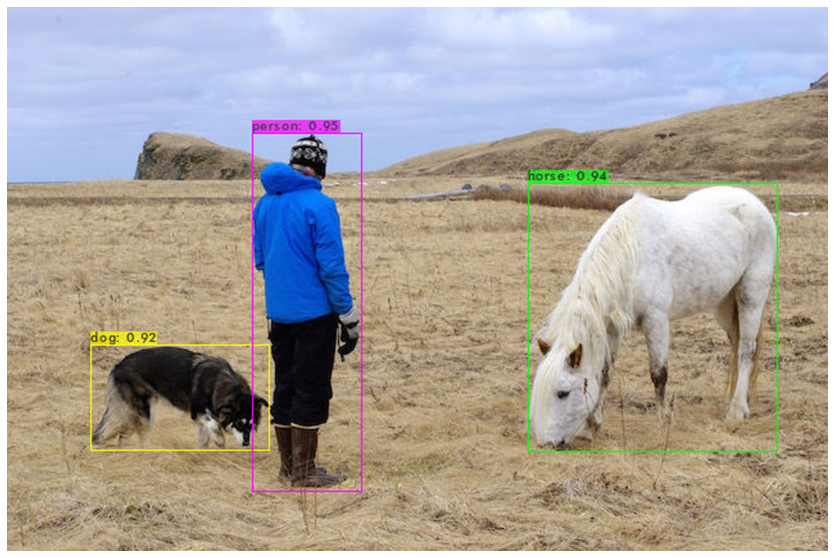

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

# Inference on a Video


Run the cell below to download and use a sample video for running Inference

In [ ]:
!gdown --id 1QDSX8e8Pwiwmvem2T2zbmGX4FvmuXMtZ

Pass the file name to the below given command for running Inference on your own Video File. The flag -dont_show will supress the frame to frame inference and prevent unnecessary warnings on colab.

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4-csp.cfg yolov4-csp.weights -dont_show test.mp4 -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.
Objects:

bus: 91% 
bus: 76% 
motorbike: 34% 
car: 89% 
car: 89% 
car: 86% 
car: 85% 
car: 83% 
car: 81% 
car: 78% 
car: 74% 
car: 73% 
car: 73% 
car: 73% 
car: 70% 
car: 69% 
car: 67% 
car: 64% 
car: 64% 
car: 63% 
car: 61% 
car: 56% 
car: 37% 
car: 37% 
person: 46% 

FPS:25.6 	 AVG_FPS:25.4

 cvWriteFrame 
Objects:

traffic light: 26% 
truck: 30% 
bus: 91% 
bus: 78% 
motorbike: 42% 
car: 89% 
car: 88% 
car: 88% 
car: 87% 
car: 84% 
car: 81% 
car: 76% 
car: 76% 
car: 74% 
car: 74% 
car: 68% 
car: 68% 
car: 67% 
car: 65% 
car: 65% 
car: 62% 
car: 62% 
car: 61% 
car: 53% 
car: 38% 
car: 36% 
person: 43% 
person: 31% 

FPS:25.6 	 AVG_FPS:25.4

 cvWriteFrame 
Objects:

traffic light: 33% 
truck: 32% 
bus: 92% 
bus: 70% 
motorbike: 35% 
person: 26% 
car: 88% 
car: 88% 
car: 87% 
car: 87% 
car: 86% 
car: 79% 
car: 78% 
car: 77% 
car: 74% 
car: 73% 
car: 71% 
car: 68% 
car: 64% 
car: 62% 
car: 62% 
car: 62% 
car: 61% 
car: 57% 
car: 56% 
car

# Multiple Images at Once
YOLOv4 object detections can be run on multiple images at once. This is done through having a text file which has the paths to several images that you want to have the detector run on.

## Saving Results to a .txt File
You can also save the results of running multiple images to a text file.

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show < data/train.txt > result.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv 

In [ ]:
download('result.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Threshold Flag
There is a flag '-thresh' you can use to add a threshold for confidences on the detections.  Only detections with a confidence level above the threshold you set will be returned.


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x

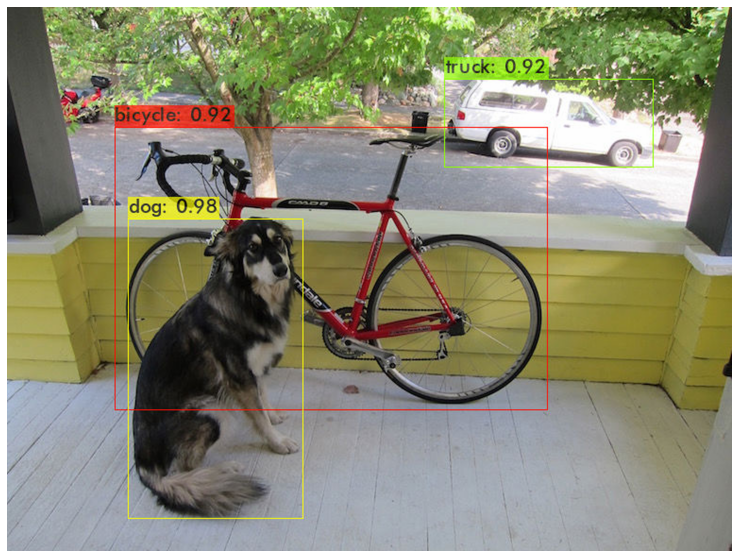

In [ ]:
# same detections but ran with the threshold flag set to 0.5 (pottedplant is no longer detected!)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg -thresh 0.5
imShow('predictions.jpg')


## Don't Show Image
You can add the flag '-dont_show' to not have the image outputted after running darknet. This doesn't really affect anything when running in Colab as the image is unable to output properly straight from darknet anyways. However, by adding the -dont_show flag you will get rid of the following warning from showing.
```
Unable to init server: Could not connect: Connection refused

(predictions:1850): Gtk-WARNING **: 17:01:00.687: cannot open display:
```

This is an important flag to have when running darknet with YOLOv4 on video as it will suppress having the video shown.

In [ ]:
96# running darknet with dont show flag set (no longer get warnings)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x